In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import datetime
import time

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics



In [3]:
Event = pd.read_csv(r'C:\Users\user\Desktop\events.csv')
Data = pd.read_csv(r'C:\Users\user\Desktop\category_tree (1).csv')
Item_Prop_1= pd.read_csv(r'C:\Users\user\Desktop\item_properties_part1.csv')
Item_Prop_2 = pd.read_csv(r'C:\Users\user\Desktop\item_properties_part2.csv')

itemid
187946    3410
461686    2539
5411      2325
370653    1854
219512    1740
298009    1642
96924     1633
309778    1565
257040    1531
384302    1528
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_17324\1030009429.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_view_items.index, y=top_view_items.values, palette='viridis')  # Renk paleti eklendi


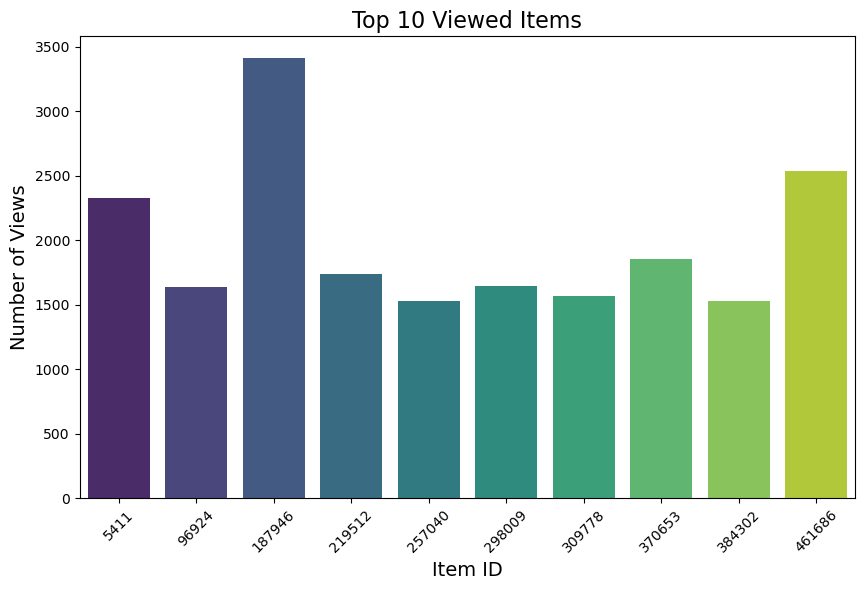

In [4]:
# En çok görüntülenen ürünler
top_view_items = Event[Event['event'] == 'view']['itemid'].value_counts().head(10)
print(top_view_items)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_view_items.index, y=top_view_items.values, palette='viridis')  # Renk paleti eklendi
plt.title('Top 10 Viewed Items', fontsize=16)
plt.xlabel('Item ID', fontsize=14)
plt.ylabel('Number of Views', fontsize=14)
plt.xticks(rotation=45)  # X eksenindeki etiketleri döndürmek için
plt.show()

In [5]:
Data.head(30)


,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
5,231,NaN
6,542,378.0
7,1146,542.0
8,1140,542.0
9,1479,1537.0


In [6]:
Event.head(30)


,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
5,1433224086234,972639,view,22556,NaN
6,1433221923240,810725,view,443030,NaN
7,1433223291897,794181,view,439202,NaN
8,1433220899221,824915,view,428805,NaN
9,1433221204592,339335,view,82389,NaN


In [7]:
Item_Prop_1.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [8]:
Item_Prop_2.head()

,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062


In [9]:
Item_Prop_1.head(20)
Item_Prop_1=pd.read_csv(r'C:\Users\user\Desktop\item_properties_part1.csv')
Item_Prop_1.head()

Item_Prop_2=pd.read_csv(r'C:\Users\user\Desktop\item_properties_part2.csv')
Item_Prop_2.head()

Item_Prop=pd.concat([Item_Prop_1, Item_Prop_2])
Item_Prop.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [10]:
Event.shape


(2756101, 5)

In [11]:
Data.shape


(1669, 2)

In [12]:
Item_Prop_1.shape


(10999999, 4)

In [13]:
Item_Prop_2.shape


(9275903, 4)

In [14]:
Item_Prop.shape


(20275902, 4)

In [15]:
Data.isnull().sum()


categoryid     0
parentid      25
dtype: int64

In [16]:
print(Data.duplicated())


0       False
1       False
2       False
3       False
4       False
        ...  
1664    False
1665    False
1666    False
1667    False
1668    False
Length: 1669, dtype: bool


In [17]:
Item_Prop_1.isnull().sum()

timestamp    0
itemid       0
property     0
value        0
dtype: int64

In [18]:
Data.dropna(axis=0)


,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
...,...,...
1664,49,1125.0
1665,1112,630.0
1666,1336,745.0
1667,689,207.0


In [19]:
Event.isnull().sum()

timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64

In [20]:
Item_Prop.isnull().sum()

timestamp    0
itemid       0
property     0
value        0
dtype: int64

In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB


In [9]:
Event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      int64         
 1   visitorid      int64         
 2   event          object        
 3   itemid         int64         
 4   transactionid  float64       
 5   datetime       datetime64[ns]
 6   interaction    int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 147.2+ MB


In [23]:
Event_df=pd.DataFrame(Event.value_counts().reset_index())
Event_df.head()

,timestamp,visitorid,event,itemid,transactionid,count
0,1430623641391,869008,transaction,40685,9765.0,1
1,1438192719117,1273306,transaction,358306,3661.0,1
2,1438194325222,1293358,transaction,162046,8047.0,1
3,1438194314465,143054,transaction,2082,3759.0,1
4,1438194141048,764672,transaction,148479,6573.0,1


In [24]:
Item_Prop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20275902 entries, 0 to 9275902
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 773.5+ MB


Collaborative filtering
This filtering method is usually based on collecting and analyzing information on user’s behaviors, their activities or preferences and predicting what they will like based on the similarity with other users.

1. User-Based Collaborative Filtering

2. Item-Based Collaborative Filtering

In [25]:
Event=pd.read_csv(r'C:\Users\user\Desktop\events.csv')
Event.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [26]:
pd.DataFrame(Event['event'].unique())

,0
0,view
1,addtocart
2,transaction


In [27]:
# Display total Events
Event['event'].size

2756101

In [28]:
# Total "event" is same as the total "items"
Event['itemid'].size

2756101

In [29]:
# Display unique item
Event['itemid'].unique().size

235061

In [30]:
# Display Total events counts
events_count = pd.DataFrame(Event.event.value_counts())
events_count

,count
event,
view,2664312
addtocart,69332
transaction,22457


In [31]:
# Display total Events in Proportion
event_count = pd.DataFrame(Event.event.value_counts(normalize=True))
event_count

,proportion
event,
view,0.966696
addtocart,0.025156
transaction,0.008148


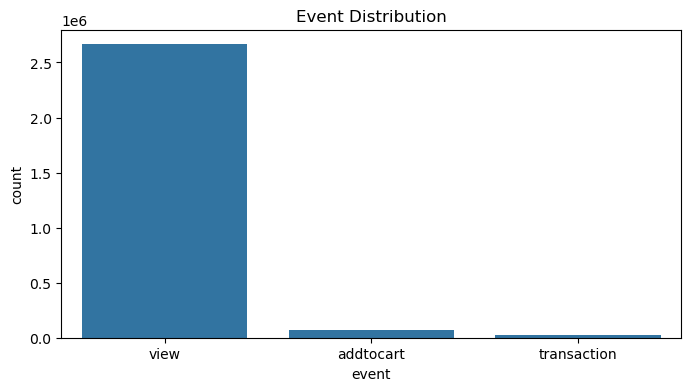

In [32]:
# Event Distribution
plt.figure(figsize=(8,4))
sns.countplot(data=Event, x='event')
plt.title('Event Distribution')
plt.show()

itemid
187946    3410
461686    2539
5411      2325
370653    1854
219512    1740
298009    1642
96924     1633
309778    1565
257040    1531
384302    1528
Name: count, dtype: int64


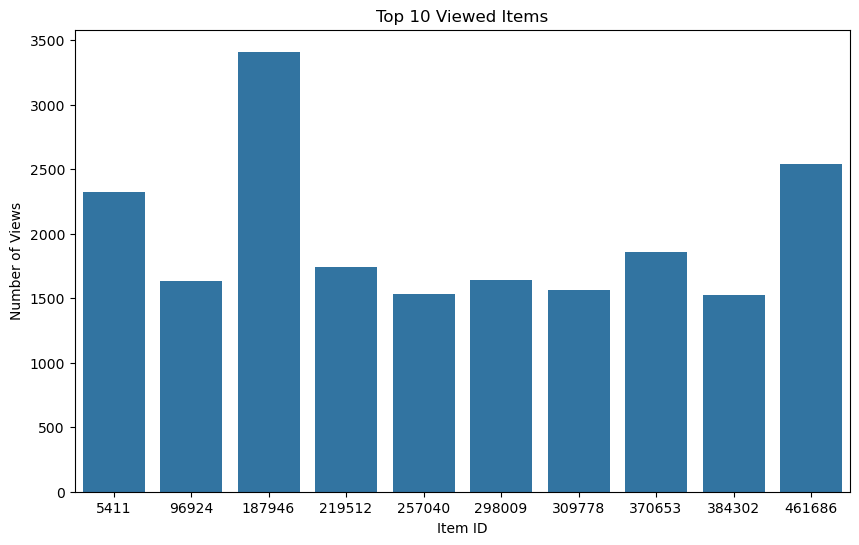

In [33]:
# Top items viewed by customer
top_view_items = Event[Event['event'] == 'view']['itemid'].value_counts().head(10)
print(top_view_items)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_view_items.index, y=top_view_items.values)
plt.title('Top 10 Viewed Items')
plt.xlabel('Item ID')
plt.ylabel('Number of Views')
plt.show()

In [34]:
# Total Transaction
Event['transactionid'].dropna().shape[0]

22457

In [35]:
# Display Unique Transaction
Event['transactionid'].unique().shape[0]

17673

In [36]:
# Customer who purchase items
customer_purchase = Event[Event.transactionid.notnull()].visitorid.unique().size
customer_purchase

11719

In [37]:
# Customer who does not purchase items
customer_notpurchase = Event[Event.transactionid.isnull()].visitorid.unique().size
customer_notpurchase

1407500

In [38]:
pd.DataFrame(Event['transactionid'].value_counts())

,count
transactionid,
7063.0,31
765.0,28
8351.0,27
2753.0,23
6993.0,21
...,...
17515.0,1
1200.0,1
8006.0,1


In [39]:
# Total customer who visited on website
Event['visitorid'].size

2756101

In [40]:
# Unique Customer who visited on Website
Event['visitorid'].unique().size


1407580

In [41]:
pd.DataFrame(Event['visitorid'].value_counts(ascending=False))[:100]

,count
visitorid,
1150086,7757
530559,4328
152963,3024
895999,2474
163561,2410
...,...
1376763,400
343137,398
1024334,398


In [42]:
top_item = pd.DataFrame(Event['itemid'].value_counts(ascending=False))[:2000]
top_item

,count
itemid,
187946,3412
461686,2978
5411,2334
370653,1854
219512,1800
...,...
446409,157
356475,157
246090,157


In [43]:
customer_item=pd.DataFrame(Event.groupby(['visitorid','itemid','event'])['timestamp'].count().reset_index())
customer_item

,visitorid,itemid,event,timestamp
0,0,67045,view,1
1,0,285930,view,1
2,0,357564,view,1
3,1,72028,view,1
4,2,216305,view,2
...,...,...,...,...
2215417,1407575,121220,view,1
2215418,1407576,356208,view,1
2215419,1407577,427784,view,1
2215420,1407578,188736,view,1


In [44]:
customer_item_df = customer_item[customer_item['event'] == 'addtocart']
customer_item_df.head()

,visitorid,itemid,event,timestamp
11,6,65273,addtocart,1
201,150,452955,addtocart,1
207,155,41882,addtocart,1
213,155,181405,addtocart,1
214,155,224623,addtocart,1


In [45]:
customer_item_df = customer_item_df[customer_item_df['itemid'].isin(top_item.index)]
customer_wise_df = customer_item_df.pivot(index='visitorid', columns='itemid', values='timestamp')
customer_wise_df

itemid,546,829,869,1152,2416,2463,2836,4001,4067,4606,...,464731,464998,465511,465522,465565,465951,466008,466109,466385,466614
visitorid,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1407129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1407319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
customer_wise_df = customer_wise_df.fillna(0)
customer_wise_df.head()

itemid,546,829,869,1152,2416,2463,2836,4001,4067,4606,...,464731,464998,465511,465522,465565,465951,466008,466109,466385,466614
visitorid,,,,,,,,,,,,,,,,,,,,,
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
item_wise_df=customer_wise_df.T
item_wise_df

visitorid,6,172,299,302,318,363,379,416,645,795,...,1406831,1406981,1407015,1407059,1407070,1407110,1407129,1407319,1407430,1407437
itemid,,,,,,,,,,,,,,,,,,,,,
546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
466008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
466109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# User-User wise similarities
similarities = cosine_similarity(customer_wise_df)
cosine_similarity_df = pd.DataFrame(similarities, index=customer_wise_df.index.values, columns=customer_wise_df.index.values)
cosine_similarity_df

,6,172,299,302,318,363,379,416,645,795,...,1406831,1406981,1407015,1407059,1407070,1407110,1407129,1407319,1407430,1407437
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1407129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1407319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1407430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
# Item-Item wise similarities
similarities = cosine_similarity(item_wise_df)
cosine_similarity_df = pd.DataFrame(similarities, index=item_wise_df.index.values, columns=item_wise_df.index.values)
cosine_similarity_df

,546,829,869,1152,2416,2463,2836,4001,4067,4606,...,464731,464998,465511,465522,465565,465951,466008,466109,466385,466614
546,1.000000,0.0,0.031908,0.093761,0.000000,0.032026,0.0,0.000000,0.074796,0.0,...,0.000000,0.149592,0.0,0.119352,0.0,0.000000,0.0,0.0,0.0,0.0
829,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
869,0.031908,0.0,1.000000,0.032410,0.022917,0.000000,0.0,0.000000,0.025854,0.0,...,0.014706,0.051709,0.0,0.000000,0.0,0.035007,0.0,0.0,0.0,0.0
1152,0.093761,0.0,0.032410,1.000000,0.000000,0.000000,0.0,0.000000,0.113961,0.0,...,0.000000,0.227921,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2416,0.000000,0.0,0.022917,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.045835,0.000000,0.0,0.000000,0.0,0.109109,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465951,0.000000,0.0,0.035007,0.000000,0.109109,0.000000,0.0,0.000000,0.000000,0.0,...,0.070014,0.000000,0.0,0.078567,0.0,1.000000,0.0,0.0,0.0,0.0
466008,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0
466109,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0
466385,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0


In [50]:
item_wise_similarity = pd.DataFrame(cosine_similarity_df.loc[829].sort_values(ascending=False))
item_wise_similarity.head(10)

,829
829,1.000000
198209,0.404145
316753,0.251754
61303,0.250217
238059,0.244949
425951,0.244949
256473,0.244949
299038,0.226779
305503,0.212132
369447,0.211695


In [51]:
# Suggestion For particular customer
suggestion_for_customer = 1407110
items_rated_by_customer = pd.DataFrame(Event[(Event['visitorid']==suggestion_for_customer)]['itemid'].unique())
items_rated_by_customer

,0
0,360922
1,35493


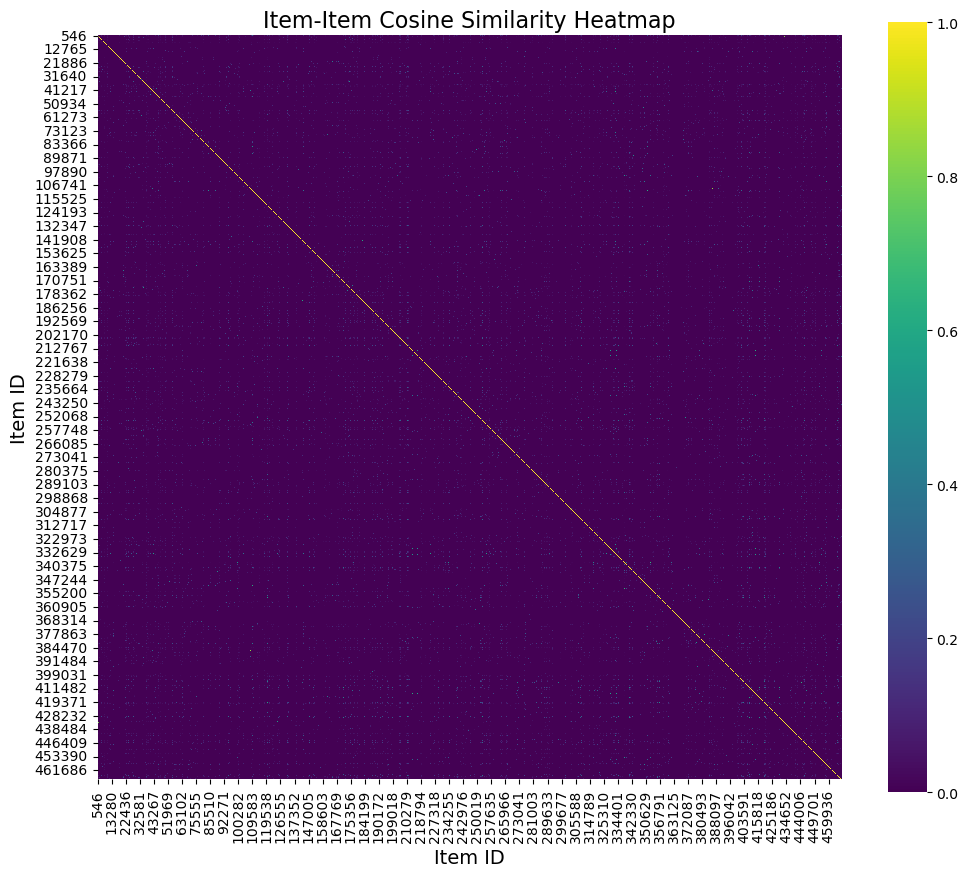

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cosine benzerlik matrisinin ısı haritasını oluşturma
plt.figure(figsize=(12, 10))
sns.heatmap(cosine_similarity_df, cmap='viridis', annot=False, fmt='.2f', square=True)
plt.title('Item-Item Cosine Similarity Heatmap', fontsize=16)
plt.xlabel('Item ID', fontsize=14)
plt.ylabel('Item ID', fontsize=14)
plt.show()

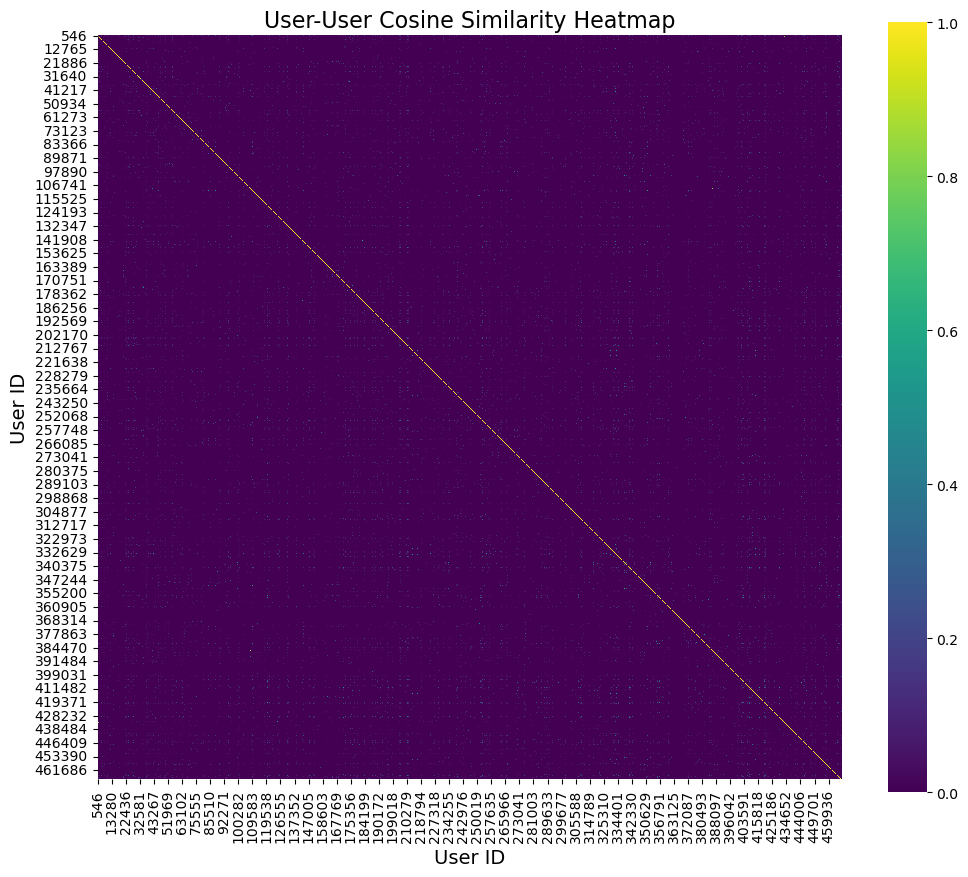

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kullanıcılar arası benzerlik matrisinin ısı haritasını oluşturma
plt.figure(figsize=(12, 10))
sns.heatmap(cosine_similarity_df, cmap='viridis', annot=False, fmt='.2f', square=True)
plt.title('User-User Cosine Similarity Heatmap', fontsize=16)
plt.xlabel('User ID', fontsize=14)
plt.ylabel('User ID', fontsize=14)
plt.show()


itemid
461686    306
312728    162
409804    156
320130    141
29196     136
7943       97
48030      95
441852     90
257040     89
445351     89
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_17324\1156907333.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_addtocart_items.index, y=top_addtocart_items.values, palette='coolwarm')  # Renk paleti eklendi


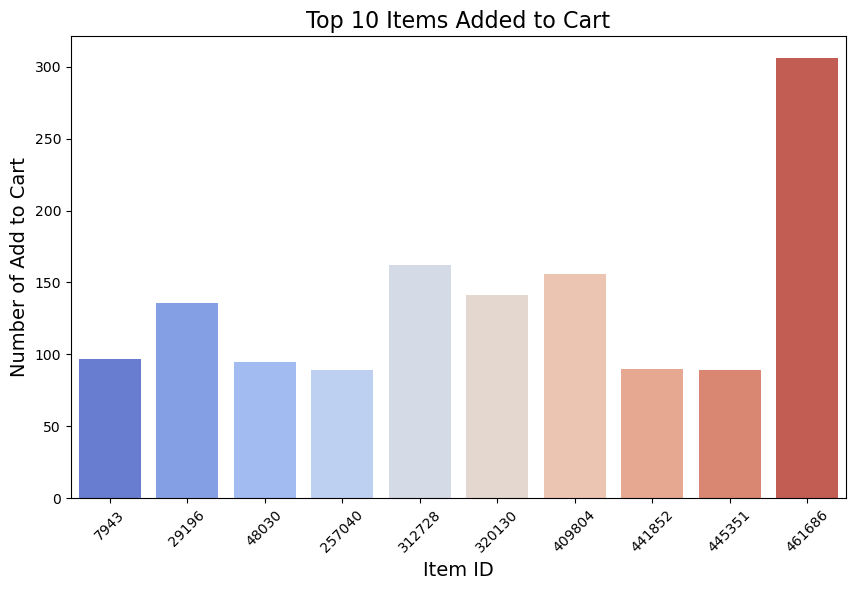

In [54]:
# En çok sepete eklenen ürünler
top_addtocart_items = Event[Event['event'] == 'addtocart']['itemid'].value_counts().head(10)
print(top_addtocart_items)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_addtocart_items.index, y=top_addtocart_items.values, palette='coolwarm')  # Renk paleti eklendi
plt.title('Top 10 Items Added to Cart', fontsize=16)
plt.xlabel('Item ID', fontsize=14)
plt.ylabel('Number of Add to Cart', fontsize=14)
plt.xticks(rotation=45)  # X ekseni etiketlerini döndürmek için
plt.show()


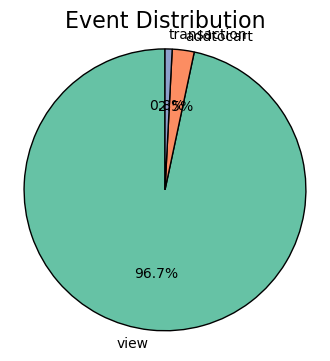

In [55]:
# Event Distribution - Pie Chart
event_counts = Event['event'].value_counts()  # Her bir event'in sayısını al
colors = sns.color_palette('Set2')  # Renk paleti seçimi

plt.figure(figsize=(4, 4))  # Grafik boyutu
plt.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Event Distribution', fontsize=16)
plt.axis('equal')  # Grafiği tam yuvarlak yapar
plt.show()


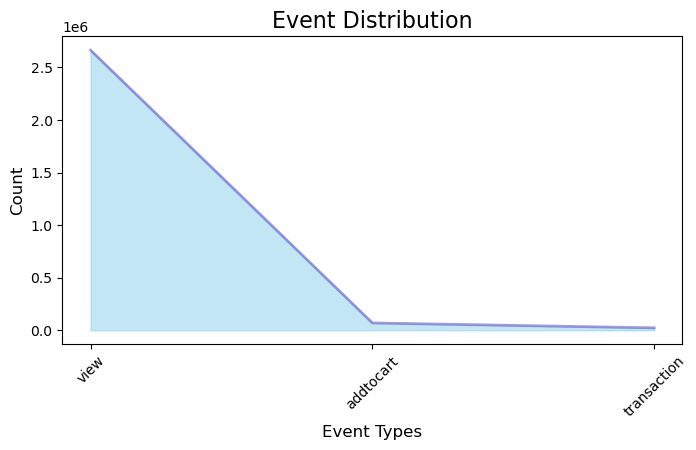

In [56]:
# Event Distribution - Area Chart
event_counts = Event['event'].value_counts()  # Her bir event'in sayısını al

plt.figure(figsize=(8, 4))
plt.fill_between(event_counts.index, event_counts.values, color='skyblue', alpha=0.5)
plt.plot(event_counts.index, event_counts.values, color='Slateblue', alpha=0.6, linewidth=2)
plt.title('Event Distribution', fontsize=16)
plt.xlabel('Event Types', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)  

data = pd.read_csv(r'C:\Users\user\Desktop\events.csv')

Event = data[['visitorid', 'itemid', 'transactionid']].copy()
Event['itemid'] = Event['itemid'].astype(str)
data_sample = data.sample(n=1000, random_state=1)
baskets = (Event.groupby(['visitorid', 'transactionid'])['itemid']
           .apply(list)
           .reset_index())
baskets_list = baskets['itemid'].tolist()
encoder = TransactionEncoder()
encoded_basket = encoder.fit_transform(baskets_list)
basket_df = pd.DataFrame(encoded_basket, columns=encoder.columns_).astype(bool)
print("0-1 Matrisi Başlangıcı:")
print(basket_df.head())

frequent_itemsets = apriori(basket_df, min_support=0.0005, use_colnames=True)
if not frequent_itemsets.empty:
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    print("İlk 5 Kural:")
    print(rules.head())

    sorted_rules = rules.sort_values(by='lift', ascending=False)
    print("Lift Değerine Göre Sıralanmış İlk 10 Kural:")
    print(sorted_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

    def öneri_yap(rules, kullanici_urunleri):
        önerilen_urunler = set()
        for _, row in rules.iterrows():
            antecedents = set(row['antecedents'])
            consequents = set(row['consequents'])
            if antecedents.issubset(kullanici_urunleri):
                önerilen_urunler.update(consequents)  
        return önerilen_urunler
    kullanici_id = '1161163'
    secilen_visitor_basket = Event[Event['visitorid'] == 1161163]['itemid'].tolist()
    if not secilen_visitor_basket:
        print(f"Seçilen visitorid ({kullanici_id}) için ürün bulunamadı.")
    else:
        print(f"Seçilen visitorid ({kullanici_id}) tarafından alınan ürünler:", secilen_visitor_basket)

        kullanici_urunleri = set(Event[Event['visitorid'] == 1161163]['itemid'])
        önerilen_urunler = öneri_yap(sorted_rules, kullanici_urunleri)

        if önerilen_urunler:
            print(f"Önerilen Ürünler: {önerilen_urunler}")
        else:
            print("Önerilen ürün bulunamadı.")
else:
    print("Sık ürün setleri bulunamadı.")


0-1 Matrisi Başlangıcı:
   100031  100095  100108  100114  100188  100193  100199  100238  100280  100282  10034  100367  100370  100393  10040  100431  100532  100586  100726  10076  100821  100898  100918  10094  100944  101034  10107  101075  101094  101128  101156  101184  101238  10124  101279  101288  101325  101393  101429  101443  10148  101554  101561  101617  10162  101652  101666  101681  101698  101714  101718  101722  10173  101747  101753  101804  101874  101876  101926  101948  101960  101969  102020  102026  102136  10219   1022  102209  102216  102255  102399  102403  102408  102410  102434  102471  102478  102525  102535  102573  102614  102618  102673  102802  102891  102925  102938  103030  103127  103156  103172  10321  103221  103242  103293  103311  103375  103407  103412  103462  103492   1035  103567  103634  103645  103686  103776  103785  103816  10384  103900  103941  103952  103961  103985  104023  104116  10412  104139  104254  104261  104342  104374  1044

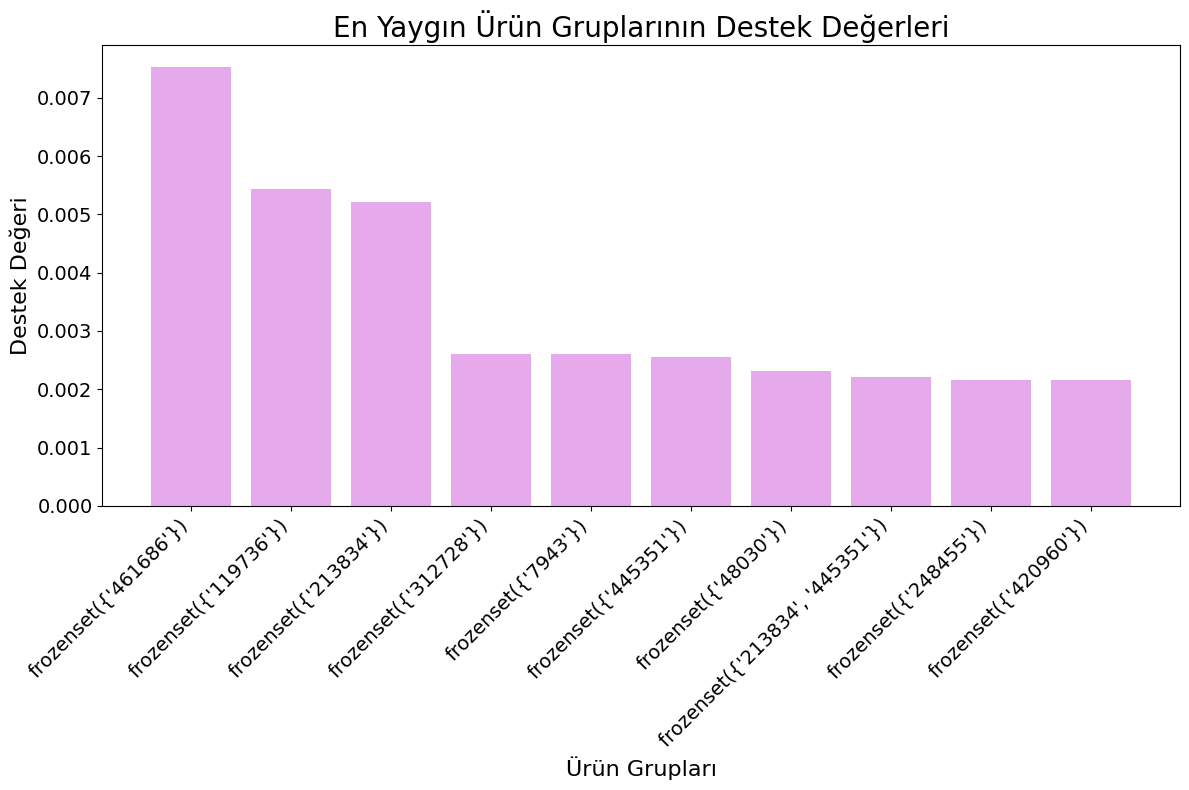

In [2]:
import matplotlib.pyplot as plt

# En yaygın ürün gruplarını ve desteklerini al
top_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)

# Bar grafiği çizme
plt.figure(figsize=(12,8))
bars = plt.bar(top_frequent_itemsets['itemsets'].astype(str), top_frequent_itemsets['support'], color='#E6A9EC')

# Başlık ve etiketler
plt.title('En Yaygın Ürün Gruplarının Destek Değerleri', fontsize=20)
plt.ylabel('Destek Değeri', fontsize=16)
plt.xlabel('Ürün Grupları', fontsize=16)

# X eksenini döndürme ve stil düzenlemeleri
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Görseli gösterme
plt.tight_layout()
plt.show()



In [3]:
import pandas as pd
# Veri setini yükleyin
Event = pd.read_csv(r'C:\Users\user\Desktop\events.csv')
Data = pd.read_csv(r'C:\Users\user\Desktop\category_tree (1).csv')
Item_Prop_1= pd.read_csv(r'C:\Users\user\Desktop\item_properties_part1.csv')
Item_Prop_2 = pd.read_csv(r'C:\Users\user\Desktop\item_properties_part2.csv')

# Zaman damgasını datetime formatına dönüştürme
Event['datetime'] = pd.to_datetime(Event['timestamp'], unit='ms')

# Yılları belirlemek için benzersiz yılları alın
years = Event['datetime'].dt.year.unique()
print("Veri setindeki yıllar:", years)


Veri setindeki yıllar: [2015]


In [4]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import cross_validate
import gc

Event['interaction'] = Event['event'].apply(lambda x: 3 if x == 'transaction' else (2 if x == 'addtocart' else 1))

reader = Reader(rating_scale=(1, 3))  
data = Dataset.load_from_df(Event[['visitorid', 'itemid', 'interaction']], reader)

trainset, testset = train_test_split(data, test_size=0.2)

model = SVD()
model.fit(trainset)

predictions = model.test(testset)
print("RMSE: ", accuracy.rmse(predictions))

cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

gc.collect()


RMSE: 0.2239
RMSE:  0.22386868194431775
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2273  0.2264  0.2256  0.2249  0.2252  0.2259  0.0009  
MAE (testset)     0.0844  0.0842  0.0838  0.0837  0.0841  0.0840  0.0003  
Fit time          39.99   39.90   39.88   39.99   42.02   40.36   0.83    
Test time         4.71    5.69    5.77    5.70    3.15    5.00    1.01    


25

Anneler Günü'nde en çok görüntülenen 10 ürün:
369447    311
51354     224
370653    145
37029     126
298009    112
335975    105
133814     98
96924      96
379520     94
438484     91
Name: itemid, dtype: int64


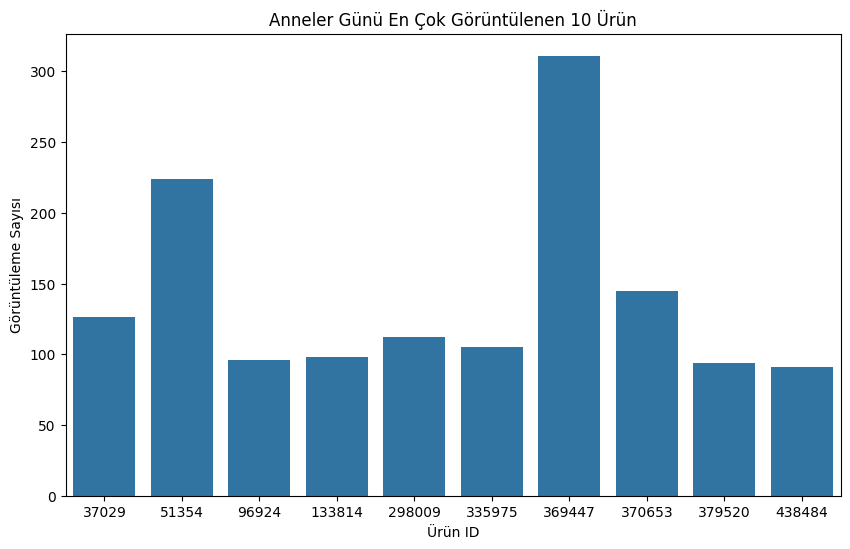

Rastgele seçilen kullanıcı ID'si: 118653
Önerilen ürünler:
Ürün ID: 369447, Tahmin Skoru: 1.0414430529357366
Ürün ID: 51354, Tahmin Skoru: 1.0414430529357366
Ürün ID: 370653, Tahmin Skoru: 1.0414430529357366
Ürün ID: 37029, Tahmin Skoru: 1.0414430529357366
Ürün ID: 298009, Tahmin Skoru: 1.0414430529357366
Ürün ID: 335975, Tahmin Skoru: 1.0414430529357366
Ürün ID: 133814, Tahmin Skoru: 1.0414430529357366
Ürün ID: 96924, Tahmin Skoru: 1.0414430529357366
Ürün ID: 379520, Tahmin Skoru: 1.0414430529357366
Ürün ID: 438484, Tahmin Skoru: 1.0414430529357366


In [5]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

Event['datetime'] = pd.to_datetime(Event['timestamp'], unit='ms')

mothers_day_period = Event[(Event['datetime'] >= '2015-05-07') & (Event['datetime'] <= '2015-05-14')]

top_view_items = mothers_day_period[mothers_day_period['event'] == 'view']['itemid'].value_counts().head(10)

if top_view_items.empty:
    print("Anneler Günü'nde görüntülenen ürün bulunamadı.")
else:
    print("Anneler Günü'nde en çok görüntülenen 10 ürün:")
    print(top_view_items)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_view_items.index, y=top_view_items.values)
    plt.title('Anneler Günü En Çok Görüntülenen 10 Ürün')
    plt.xlabel('Ürün ID')
    plt.ylabel('Görüntüleme Sayısı')
    plt.show()

    users_with_addtocart = Event[Event['event'] == 'addtocart']['visitorid'].unique()

    random_user_id = random.choice(users_with_addtocart)
    print(f"Rastgele seçilen kullanıcı ID'si: {random_user_id}")

    uid = str(random_user_id) 
    items_to_suggest = []

    for iid in top_view_items.index:
        pred = model.predict(uid, str(iid))
        items_to_suggest.append((iid, pred.est))

    print("Önerilen ürünler:")
    for item, score in items_to_suggest:
        print(f"Ürün ID: {item}, Tahmin Skoru: {score}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
Seçilen aktif kullanıcı: 978620
Önerilen ürünler: [75555, 334947, 386918, 179110, 223944, 86057, 25071, 367826, 46232, 94041, 286044, 430845, 19583]


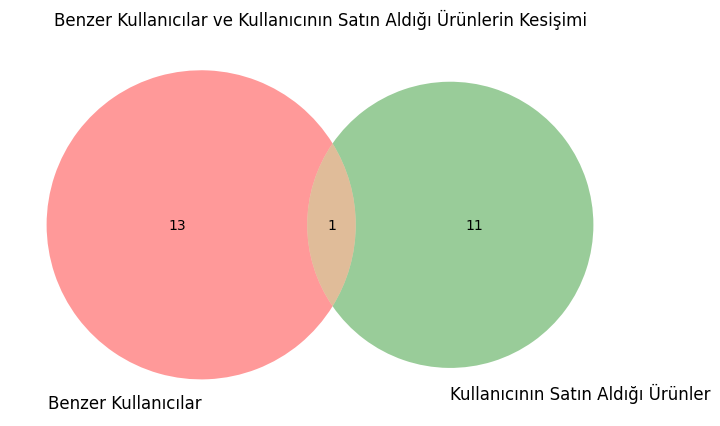

2744

In [7]:
import random
import pandas as pd
from surprise import Dataset, Reader
from surprise import KNNBasic
import gc
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

interaction_threshold = 10
user_counts = Event['visitorid'].value_counts()
active_users = user_counts[user_counts >= interaction_threshold].index.tolist()

Event_filtered = Event[Event['visitorid'].isin(active_users)]

reader = Reader(rating_scale=(1, 3))  
data = Dataset.load_from_df(Event_filtered[['visitorid', 'itemid', 'transactionid']], reader)

model = KNNBasic(sim_options={'name': 'cosine', 'user_based': True, 'min_k': 5, 'k': 5})  

trainset = data.build_full_trainset()

model.fit(trainset)

users_with_common_items = []

for user_id in active_users:
    items_rated_by_customer_list = set(Event_filtered[Event_filtered['visitorid'] == user_id]['itemid'].tolist())
    
    inner_user_id = trainset.to_inner_uid(user_id)
    similar_users = model.get_neighbors(inner_user_id, k=5)  
    common_items_found = False  

    for similar_user in similar_users:
        
        similar_user_id = trainset.to_raw_uid(similar_user)
        
        similar_user_items = set(Event_filtered[Event_filtered['visitorid'] == similar_user_id]['itemid'].tolist())
        
        
        if items_rated_by_customer_list & similar_user_items:  
            common_items_found = True
            break  
    if common_items_found:
        users_with_common_items.append(user_id)

if len(users_with_common_items) > 0:
    random_user_id = random.choice(users_with_common_items)
    print(f"Seçilen aktif kullanıcı: {random_user_id}")

    items_rated_by_customer_list = set(Event_filtered[Event_filtered['visitorid'] == random_user_id]['itemid'].tolist())

  
    inner_user_id = trainset.to_inner_uid(random_user_id)
    similar_users = model.get_neighbors(inner_user_id, k=5)  


    similar_users_items = set()
    common_items_found = False  

    for similar_user in similar_users:
        similar_user_id = trainset.to_raw_uid(similar_user)
        
        similar_user_items = set(Event_filtered[Event_filtered['visitorid'] == similar_user_id]['itemid'].tolist())
        
        if items_rated_by_customer_list & similar_user_items:  
            common_items_found = True
            similar_users_items.update(similar_user_items)

    if common_items_found:
        items_to_suggest = [item for item in similar_users_items if item not in items_rated_by_customer_list]

        if items_to_suggest:
            print(f"Önerilen ürünler: {items_to_suggest}")

            # Benzer kullanıcılar ve önerilen ürünler için Venn diyagramı
            set_similar_users_items = set(similar_users_items)
            set_user_rated_items = set(items_rated_by_customer_list)

            plt.figure(figsize=(8, 8))
            venn2([set_similar_users_items, set_user_rated_items], 
                  set_labels=('Benzer Kullanıcılar', 'Kullanıcının Satın Aldığı Ürünler'))
            plt.title("Benzer Kullanıcılar ve Kullanıcının Satın Aldığı Ürünlerin Kesişimi")
            plt.show()

        else:
            print("Hiçbir yeni ürün önerilemiyor.")
    else:
        print("Hiçbir ortak ürün bulunamadı.")
else:
    print("Ortak ürün bulunan aktif kullanıcı bulunamadı.")

del similar_users_items, items_to_suggest
gc.collect()


In [8]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
import pandas as pd
import random

users_with_addtocart = Event[Event['event'] == 'addtocart']['visitorid'].unique()

reader = Reader(rating_scale=(1, 5))

df_ratings = Event[Event['event'] == 'addtocart'].groupby(['visitorid', 'itemid']).size().reset_index(name='rating')

dataset = Dataset.load_from_df(df_ratings[['visitorid', 'itemid', 'rating']], reader)

trainset, testset = train_test_split(dataset, test_size=0.2)

sim_options = {
    'name': 'cosine',
    'user_based': False 
}

model = KNNBasic(sim_options=sim_options)
model.fit(trainset)

for random_user_id in users_with_addtocart:
    print(f"\nSeçilen kullanıcı ID'si: {random_user_id}")

    user_interactions = Event[(Event['visitorid'] == random_user_id) & (Event['event'] == 'addtocart')]['itemid'].tolist()

    if len(user_interactions) == 0:
        print(f"Kullanıcı {random_user_id} için sepete eklenen ürün bulunamadı.")
    else:
        print(f"Kullanıcı {random_user_id} sepete eklediği ürünler:", user_interactions)

        suggestions = []
        for item in user_interactions:
            try:
                inner_id = trainset.to_inner_iid(item)  
                neighbors = model.get_neighbors(inner_id, k=5)  
                suggestions.extend([trainset.to_raw_iid(neighbor) for neighbor in neighbors])  
            except ValueError:
                print(f"Ürün ID'si {item} geçersiz.")

        unique_suggestions = list(set(suggestions))
        print(f"Kullanıcı {random_user_id} için önerilen ürünler:", unique_suggestions)


Computing the cosine similarity matrix...
Done computing similarity matrix.

Seçilen kullanıcı ID'si: 287857
Kullanıcı 287857 sepete eklediği ürünler: [5206]
Kullanıcı 287857 için önerilen ürünler: [108515, 149382, 37863, 242156, 234414]

Seçilen kullanıcı ID'si: 158090
Kullanıcı 158090 sepete eklediği ürünler: [10572]
Kullanıcı 158090 için önerilen ürünler: [260194, 171878, 17478, 146642, 276402]

Seçilen kullanıcı ID'si: 1193904
Kullanıcı 1193904 sepete eklediği ürünler: [255275]
Kullanıcı 1193904 için önerilen ürünler: [328486, 295537, 155574, 445559, 334714]

Seçilen kullanıcı ID'si: 599528
Kullanıcı 599528 sepete eklediği ürünler: [356475]
Kullanıcı 599528 için önerilen ürünler: [210279, 88904, 283115, 257040, 278586]

Seçilen kullanıcı ID'si: 105775
Kullanıcı 105775 sepete eklediği ürünler: [312728]
Kullanıcı 105775 için önerilen ürünler: [84643, 268335, 257040, 295537, 278586]

Seçilen kullanıcı ID'si: 196602
Kullanıcı 196602 sepete eklediği ürünler: [63312]
Kullanıcı 196602 içi

KeyboardInterrupt: 